### MY470 Computer Programming
# Algorithms and Order of Growth
### Week 10 Lecture, MT 2017

## Overview

* Algorithms and computational complexity
* Time complexity
    * Big-O notation
    * Important computational complexity classes
    * Performance of common Python data structures and methods
* Space complexity
---
* Useful Python package: `matplotlib`

## From Week 1: What Is an Algorithm?

A well-defined computational procedure that takes value(s) as input and produces value(s) as output

  * "Recipe" or "instructions" for solving a well-defined computational problem
  * Consists of a sequence of simple steps, control flow, and a stopping rule
  * Can be specified in human language or programming language

## Algorithm Analysis

Helps compare algorithms based on the amount of **computing resources** they use

  * Time (execution or **running time**)
  * Space (**memory**)


## Time Complexity: Example 1

How long does this program take to run?

In [2]:
def sum_of_n(n):
    '''Assumes n is a positive integer. 
    Calculates the sum of all integers from 1 to n, inclusive.'''
    res = 0
    for i in range(1, n + 1):
        res += i
    return res

## Benchmarking

In [3]:
import time

start = time.time()
res = sum_of_n(1000000)
end = time.time()
print(res, end - start)

500000500000 0.0682370662689209


## Limitations to Benchmarking 

Running time depends on:

  * The speed of the computer
  * The programming language
  * The compiler/programming language implementation
  * The value of the input

In [4]:
for i in [100000, 1000000, 10000000]:
    start = time.time()
    res = sum_of_n(i)
    end = time.time()
    print(res, end - start)

5000050000 0.006281852722167969
500000500000 0.05945992469787598
50000005000000 0.5503628253936768


## Measure Algorithm Efficiency Inpendently of Computer and Program

* Count **number of steps**, or basic operations (not seconds)
* Express measure as **function of the size of inputs**
* Consider the **upper bound** on the running time (the worst-case scenario) 
* Use an **approximation** as the size of the input gets extremely large

## Time Complexity: Example 1

In [5]:
def sum_of_n(n):
    '''Assumes n is a positive integer. 
    Calculates the sum of all integers from 1 to n, inclusive.'''
    res = 0
    for i in range(1, n+1):
        res += i
    return res

* The basic operation is assignment
* The number of steps is $T(n) = 1 + n$
* This is on the order of n: $O(n)$

## Big-O Notation

* The mathematical way to express running time
* Gives an **upper bound** on the asymptotic growth (also called **order of growth**) of an algorithm

   >The complexity of `func(x)` is $O(x^2)$

   * This means that in the worst case `func` will take on the order of $x^2$ steps to run.

## Important Computational Complexity Classes

| Big-O notation      | Running time   
| :------------ |:------
| $O(1)$     | constant           
| $O(\log n)$ | logarithmic  
| $O(n)$     | linear
| $O(n \log n)$ | log-linear 
| $O(n^c)$ | polynomial
| $O(c^n)$ | exponential

## Comparison of Complexity Classes

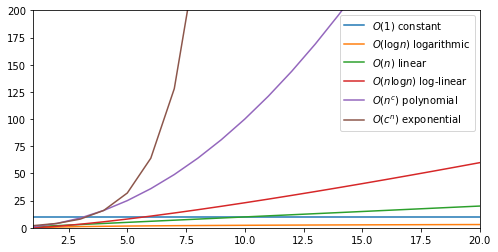

In [6]:
import matplotlib.pyplot as plt
import math

x = [i for i in range(1, 21)]

plt.figure(figsize=(8, 4))
plt.plot(x, [10 for i in x], label = r'$O(1)$ constant')
plt.plot(x, [math.log(i) for i in x], label = r'$O(\log n)$ logarithmic')
plt.plot(x, [i for i in x], label = r'$O(n)$ linear')
plt.plot(x, [i*math.log(i) for i in x], label = r'$O(n \log n)$ log-linear')
plt.plot(x, [i**2 for i in x], label = r'$O(n^c)$ polynomial')
plt.plot(x, [2**i for i in x], label = r'$O(c^n)$ exponential')
plt.legend(loc='upper right')
plt.ylim(0, 200)
plt.xlim(1, 20)
plt.show()


## Approximation

* Keep the term with the largest growth rate
* Drop any constants from the remaining term

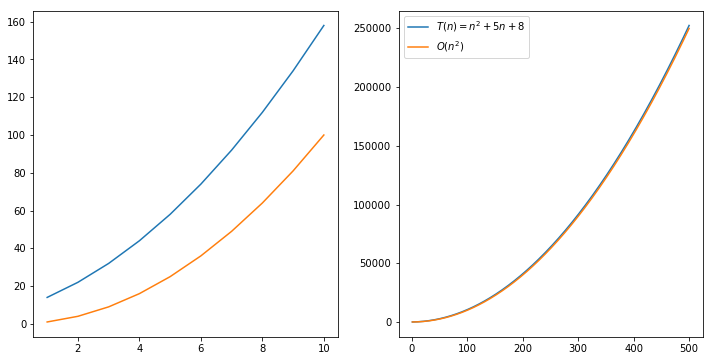

In [7]:
import matplotlib.pyplot as plt
import math

maxx = [11, 501]
fig = plt.figure(figsize=(12, 6))

for k in range(len(maxx)):
    plt.subplot(1, 2, k+1)
    x = [i for i in range(1, maxx[k])]
    plt.plot(x, [i*i + 5*i + 8 for i in x], label = r'$T(n) = n^2 + 5n + 8$')
    plt.plot(x, [i*i for i in x], label = r'$O(n^2)$')
plt.legend(loc='upper left')
plt.show()


## Constant Complexity: $O(1)$

* Running time is independent of the input size

In [8]:
def sum_of_n(n):
    '''Assumes n is a positive integer. 
    Calculates the sum of all integers from 1 to n, inclusive.'''
    return int((n*(n+1))/2)

for i in [100000, 1000000, 10000000]:
    start = time.time()
    res = sum_of_n(i)
    end = time.time()
    print(res, end - start)

5000050000 3.0994415283203125e-06
500000500000 2.6226043701171875e-06
50000005000000 1.6689300537109375e-06


## Logarithmic Complexity: $O(\log n)$

* Running time grows as the log of at least one of the inputs
* Typically, we use base 2 but the base of the logarithm does not matter as $\log_2 x = log_2 10 * log_{10} x$ and we ignore constants
* If we use base 2, then we can say: **Every time the size of the input doubles, the algorithm performs one additional step.**

*To install R in Anaconda, run the following in the Terminal:* `conda install r-essentials`. *Then restart the Jupyter server.*

In [4]:
### R code ###

# Program using bisection search to find an approximation 
# within epsilon to the square root of a number x.
bisec_search <- function(x, epsilon) {
  # Define interval for search
  low <- 0
  high <- max(1, x)

  # Start in the middle
  guess <- (low + high) / 2

  # Narrow down search interval until guess close enough
  while (abs(guess ** 2 - x) >= epsilon) {
    if (guess ** 2 < x) {
      low <- guess
    } else {
      high <- guess
    }
    guess <- (low + high) / 2
  }
  return(guess)
}

bisec_search(25, 0.01)

[1] 5.000305

## Linear Complexity: $O(n)$

* Usually, algorithms dealing with lists and sequences as they touch each element of the sequence a constant number of times
    * E.g., comparing two strings

In [10]:
for x in range(10):
    print(x, end=' ')

0 1 2 3 4 5 6 7 8 9 

In [3]:
### R code ###
        
# Program to find n!        
factorial <- function(n) {    
  if (n == 1) {
    return(n)
  } else {
    return(n * factorial(n-1))
  }
}

factorial(5)

[1] 120

## Log-Linear Complexity: $O(n \log n)$

* Many practical algorithms are log-linear
* For example, **sorting a list**
* Next week, we'll study different sorting algorithms

## Polynomial Complexity: $O(n^c)$

* E.g. quadratic $O(n^2)$ or cubic $O(n^3)$
* Usually, algorithms with nested loops

In [1]:
n = 10
test = 0
for i in range(1, n + 1):
    for j in range(1, n + 1):
        test += i * j
print(test)

3025


## Exponential Complexity: $O(c^n)$

* Many important problems are inherently exponential
* Exponential algorithms are considered too slow to be practical
* In such cases, we can find algorithms that provide approximate solutions or at least address specific instances of the problem

In [1]:
### R code ###

# Program to find the n-th Fibonacci number using recursion
recurse_fibonacci <- function(n) {
    if(n <= 1) {
        return(n)
    } else {
        return(recurse_fibonacci(n-1) + recurse_fibonacci(n-2))
    }
}

print(recurse_fibonacci(10))

[1] 55


## Analyzing Time Complexity

Where to look:

* Function and method calls 
* Recursive calls
* Loops


## Time Complexity of Python List Methods

* Growing a list
    * `l.append(k)` is $O(1)$
    * `l + k` is $O(k)$

In [13]:
def l_concatinate(k):
    lst = []
    for i in range(k):
        lst = lst + [i]
    return lst

def l_append(k):
    lst = []
    for i in range(k):
        lst.append(i)        
    return lst

def timit(fnc, func_arg):
    start = time.time()
    fnc(*func_arg)  # Pass items from iterable as function arguments
    end = time.time()
    print(fnc.__name__, '\t', end - start)
    
timit(l_concatinate, (10000,))
timit(l_append, (10000,))

l_concatinate 	 0.10977721214294434
l_append 	 0.0006499290466308594


## Time Complexity of Python List Methods

* Creating a list

In [14]:
'''
def l_concatinate(k):
    lst = []
    for i in range(k):
        lst = lst + [i]
    return lst

def l_append(k):
    lst = []
    for i in range(k):
        lst.append(i)        
    return lst
'''

def l_comprehen(k):
    return [i for i in range(k)]

def l_range(k):
    return list(range(k))

timit(l_concatinate, (10000,))
timit(l_append, (10000,))
timit(l_comprehen, (10000,))
timit(l_range, (10000,))

l_concatinate 	 0.1064760684967041
l_append 	 0.0006449222564697266
l_comprehen 	 0.0002689361572265625
l_range 	 0.0001308917999267578


## Time Complexity of Python List Methods

$O(1)$

* Indexing `[]`, `append`, `pop()`


$O(n)$

* Iteration, `pop(i)`, `insert`, `del`, `remove`, `in`, `reverse`, `min`, `max`

$O(n \log n)$

* `sort`




## Time Complexity of Python Dictionary Methods

$O(1)$

* Indexing `[]`, `in`, `del`


$O(n)$

* Iteration


In [15]:
def in_seq(i, seq):
    return i in seq

print('List:')
for n in [10000, 100000, 1000000]:
    last = n-1
    lst = [i for i in range(n)]
    timit(in_seq, (last, lst))

print('Dictionary:')
for n in [10000, 100000, 1000000]:
    last = n-1
    dic = {i:None for i in range(n)}
    timit(in_seq, (last, dic))


List:
in_seq 	 0.00011086463928222656
in_seq 	 0.001123189926147461
in_seq 	 0.012640953063964844
Dictionary:
in_seq 	 9.5367431640625e-07
in_seq 	 1.9073486328125e-06
in_seq 	 2.86102294921875e-06


## Space Complexity 

Use Big-O notation for the amount of memory required by an algorithm

Compare the total size of any new variables the algorthm is allocating, relative to the size of the input

Where to look:

* New lists, dictionaries, etc.
* New stacks in recursive calls

## Space Complexity: Examples 1-2

* $O(1)$

In [16]:
def print_n_times(s, n):
    for i in range(n):
        print(s)        

* $O(n)$

In [17]:
def combine_n_times(s, n):
    ls = [s for i in range(n)]
    return ls

## Space Complexity: Example 3

In [18]:
def list_sum(lst):
    if len(lst) == 1:  
        return lst[0]
    else:
        return lst[0] + list_sum(lst[1:])     

list_sum(list(range(100)))

4950

Each recursive call is added to the call stack and takes up actual memory. Thus, the algorithm takes $O(n)$ space.

![Recursion](figs/recursion.png "Recursion")

## Space Complexity: Exercise 1

In [3]:
def pair_list_sum(lst):
    res = 0
    for i in range(len(lst) - 1):
        if i%2==0:
            res += pair_sum(lst[i], lst[i+1])
        # if the one but last index is odd, just add the last number to the sum
        elif i==len(lst) - 2:
            res += lst[i+1]
    return res 
    
def pair_sum(a, b):
    return a + b

pair_list_sum(list(range(100)))

4950

## Space Complexity: Exercise 2

In [20]:
def fib(n):
    '''Assumes n is a non-negative integer.
    Finds the n-th Fibonacci number using recursion.'''
    if n <= 1:
        return n
    else:
        return fib(n - 1) + fib(n - 2)
    return answer

print(fib(10))

55


## Complexity Analysis in Practice

* There is no fixed list of possible runtimes, e.g. $O(\sqrt n)$, $O(n!)$, ...
* Runtimes can be a function of more than one input, e.g. $O(nk)$, $O(n + k)$

* Big-O describes the rate of increase in runtime, not the actual runtime
    * Benchmarking is still a useful tool

* Big-O ignores contsants but they often matter in practice
    * If you reduce your code from three loops to one loop, Big-O will not change but the difference may be on the order of hours or days! 

* There is often a tradeoff between time and space efficiency
* You need a balance between runtime, space, implementation time, maintainability, and readability

## Analyzing and Benchmarking Your Code: Exercise 1

In [2]:
import csv

def get_data():
    '''Reads the file Wholesale customers data.csv and returns part of the data
       as a list of lists.'''
    with open('Wholesale customers data.csv') as f:
        reader = csv.reader(f)
        data = [[int(i) for i in row[2:]] for row in reader if row[0]!='Channel']
    return data

def get_centroid(pointLists):
    num = len(pointLists)
    centroids=[]
    demension = len(pointLists[0])
    
    for a in range(demension):
        centroids.append(0.0)

    for i in range(num):
        point =  pointLists[i]
        for d in range(demension):
            centroids[d] = centroids[d]+point[d]
            
    for a in range(demension):
        centroids[a] = centroids[a]/num

    return centroids

def get_centroid_2(points):
    '''Estimates the centroid for a collection of n-dimensional points.
    Assumes points is a collection of lists of numerical values.
    Returns a list of numerical values (the coordinates of the centroid).'''
    centroid = []
    num_points = len(points)
    num_dims = len(points[0])
    for dim in range(num_dims):
        coord = [i[dim] for i in points]
        centroid.append(sum(coord)/num_points)
    return centroid

data = get_data()
print(get_centroid(data))
print(get_centroid_2(data))

[12000.297727272728, 5796.265909090909, 7951.277272727273, 3071.931818181818, 2881.4931818181817, 1524.8704545454545]
[12000.297727272728, 5796.265909090909, 7951.277272727273, 3071.931818181818, 2881.4931818181817, 1524.8704545454545]


## Analyzing and Benchmarking Your Code: Exercise 2

In [ ]:
# Two inputs: list coauthors of length c and dictionary author_dic of length d

# Algorithm 1
for k, v in author_dic.items():
    vlst = [sub_list[1] for sub_list in coauthors if sub_list[0]==k and sub_list[1]!=k]
    vlst = sorted(vlst)
    author_dic[k] = vlst
    
# Algorithm 2
for i, j in coauthors:
    if j!=i:
        author_dic[i].append(j)

## Algorithms and Order of Growth

* **Algorithmic complexity**, also called running time and order of growth, refers to the number of steps a program takes as a function of the size of its inputs  

* We use **Big-O** notation to express how, in the worst-case scenario, an algorithm's **running time or space requirements** grow as the input size grows

* **Complexity analysis and benchmarking** are essential for designing programs that can efficiently manage large amounts of data and large numbers of users 


-------

* **Lab**: Practicing order of growth analysis
* **Next week**: Basic searching and sorting algorithms, course summary, guidance for final project

---

### MY470 Computer Programming
# Useful Python Package: `matplotlib`
### Week 10 Extra, MT 2017

## Background

* **`matplotlib`** is the most used Python package for 2D graphics 
* To quickly and easily generate figures, use the procedural interface provided by pyplot 
    * **`pyplot`** provides functions that make `matplotlib` work like MATLAB 
* To achieve more customization and control, use the object-oriented approach with the **`Axes`** class


## Typical Steps for Plotting with `pyplot`

### 1. Import `pyplot` 
* **`import matplotlib.pyplot as plt`**

\*Set global parameters
* `import matplotlib as mpl`
* `mpl.rcParams['font.family'] = 'sans-serif'`
    
\*Define figure and subplots
* `plt.figure(*figsize)`
* `plt.subplot(nrow, ncol, plotnum)`
    
### 2. Plot with plot parameters
* **`plt.plot(x, y, *c, *lw, *label)`**
* `plt.scatter(x, y, *s, *c, *marker, *alpha, *label)`
* `plt.boxplot(x, *positions, *widths)`
* `plt.hist(x, *bins, *color)`
* `plt.bar(x, y, *width, *color, *yerr)`

\*Adjust specific figure parameters
* `plt.xlim(xmin, xmax)`
* `plt.xticks(locs, *labels)`

\*Add annotations    
* `plt.xlabel(s)`    
* `plt.title(s)`
* `plt.legend(*loc, *ncol)`
* `plt.text(x, y, s, *fontsize)`
    
### 3. Show or save figure
* **`plt.show()`**
* `plt.savefig(fname)`


## Example 1: As Simple As It Gets

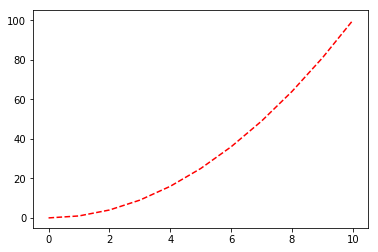

In [54]:
import matplotlib.pyplot as plt

x = [i for i in range(11)]
y = [i**2 for i in x]

plt.plot(x, y, 'r--')  # 'r--' is an optional format string indicating color and line type
plt.show()

## Example 2: Make It Prettier

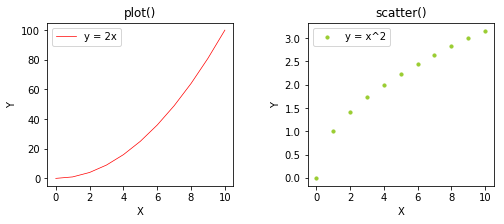

In [58]:
import matplotlib.pyplot as plt

x = [i for i in range(11)]
y1 = [i**2 for i in x]
y2 = [i**0.5 for i in x]

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(wspace = 0.4)

plt.subplot(1, 2, 1)
plt.plot(x, y1, c='r', lw=0.7, label = 'y = 2x')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('plot()')

plt.subplot(1, 2, 2)
plt.scatter(x, y2, c='yellowgreen', s=10, label = 'y = x^2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('scatter()')

plt.savefig('figs/pyplot_demo.pdf')
plt.show()

## Example 3: The Possibilities Are Limitless

![Plot of 33 cooperation experiments](figs/inequality_fig_1.png "Plot of 33 cooperation experiments")

## Resources

* Get started: [Scipy lecture notes](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
* Get inspired: [Matplotlib gallery](http://matplotlib.org/gallery.html)
* Get it done: [Pyplot API](http://matplotlib.org/api/pyplot_summary.html)
* Get it done better: [Axes API](https://matplotlib.org/api/axes_api.html)